# Outliers Detection

You need to create an algorithm that can find outliers in the data by one column / several columns. E.g., some members have extremely high costs for the current month and your solution should be able to detect such records. Think about features and how you would explain them to business people. All financial columns contain the $ sign.

## Data Exploration

In [1]:
import pandas as pd
import os

In [2]:
current_dir = os.getcwd()
csv_path = os.path.join(current_dir, 'data', 'sfr_test.csv')

sfrs = pd.read_csv(csv_path)

In [3]:
sfrs.sample(n=5, random_state=42)

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
4228,4229,M,08/06/1957,2020,202006,VIPcare,NON-SNP,MEDICARE - CAREFREE,32,HMO,...,$0.00,"$3,421.39",$0.00,$9.28,$0.00,$0.00,$0.00,$0.00,$0.00,$708.16
2128,2129,M,20/10/1950,2020,202006,Affiliate,D-SNP,NaN,19,HMO,...,$0.00,"$15,787.54",$0.00,$8.37,$0.00,"$2,148.68",$0.00,"$2,016.61","$2,005.57",$703.82
1408,1409,F,10/06/1947,2020,202006,Affiliate,NON-SNP,NaN,11,HMO,...,$0.00,"$8,371.59",$31.85,$8.50,$0.00,$646.66,$0.00,$687.77,$641.46,$682.94
5396,5397,F,26/03/1959,2020,202006,VIPcare,NON-SNP,NaN,41,HMO,...,$0.00,"$17,635.76",$0.00,$8.46,$0.00,$91.78,$0.00,$100.17,$88.83,$903.96
2870,2871,M,03/04/1942,2020,202006,Affiliate,NON-SNP,NaN,22,HMO,...,$0.00,"$17,128.22",$0.00,$9.45,$0.00,"$7,292.30",$0.00,"$6,996.36","$7,404.74",$851.34


Columns that contain the dollar $ sign are: `ipa_funding`, `ma_premium`, `ma_,risk_score mbr_with_rx_rebates, partd_premium, pcp_cap, pcp_ffs, plan_premium, prof, reinsurance, risk_score_partd, rx, rx_rebates, rx_with_rebates, rx_without_rebates` and `spec_cap`. Exactly 16 out of the 28 available. For easier manipulation, we will put them in a variable.

In [4]:
financial_columns = [
    "ipa_funding",
    "ma_premium",
    "ma_risk_score",
    "mbr_with_rx_rebates",
    "partd_premium",
    "pcp_cap",
    "pcp_ffs",
    "plan_premium",
    "prof",
    "reinsurance",
    "risk_score_partd",
    "rx",
    "rx_rebates",
    "rx_with_rebates",
    "rx_without_rebates",
    "spec_cap"
]


In [5]:
# remove the dollar sign from the financial columns
sfrs[financial_columns] = sfrs[financial_columns].replace('[$,]', '', regex=True).astype(float)

We will consider two approaches to the outlier detection problem we are having: 
- uni- and 
- multi-variate.

## Uni-Variate Outlier Detection

In [6]:
sfrs[financial_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ipa_funding,10530.0,10657.849594,7690.191694,1302.36,5390.6450,8723.135,13444.6325,113850.93
ma_premium,10530.0,12311.727551,8955.579076,1394.85,6200.2550,10060.455,15479.8400,155112.65
ma_risk_score,10530.0,14.601082,11.398322,0.00,6.5025,11.740,18.9200,174.60
mbr_with_rx_rebates,10530.0,500.425354,1130.533796,13.94,197.2100,312.365,499.3525,32687.50
partd_premium,10530.0,281.523642,239.155174,8.62,130.7800,220.590,352.0325,3120.53
pcp_cap,10530.0,507.875923,269.436836,0.00,503.0200,613.500,684.2600,833.33
pcp_ffs,10530.0,44.715122,279.992983,0.00,0.0000,0.000,0.0000,6056.44
plan_premium,10530.0,12622.875903,9165.144567,1295.18,6362.8100,10317.105,15886.7650,138352.50
prof,10530.0,407.262296,1787.161653,0.00,0.0000,0.000,0.0000,69516.96
reinsurance,10530.0,8.728322,0.505910,7.91,8.2900,8.690,9.1600,9.67


Here are some bullet points about the data that might indicate some outliers:

* the difference between the 75th and the max value of mbr_with_rx_rebates is very big compared to other quantiles
* the 75th percentile of pcp_ffs is still zero, while its max is 6056.44
* the 75th percentile of prof is still zero, while its max is 69516.96
* all values of risk_score_partd and rx_rebates are zeros - these can be removed from the data
* rx_with_rebates and rx_without_rebates have almost identical values

In [7]:
financial_columns.remove("risk_score_partd")
financial_columns.remove("rx_rebates")

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

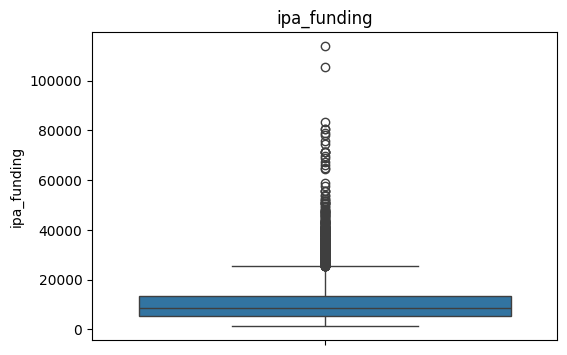

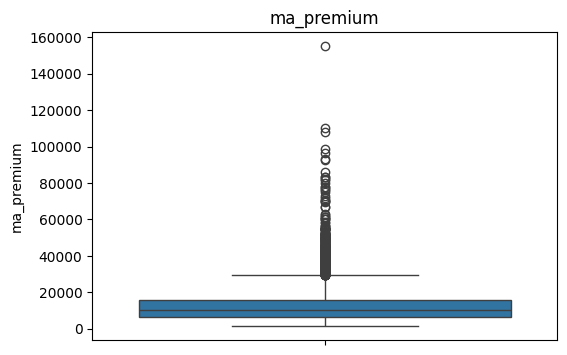

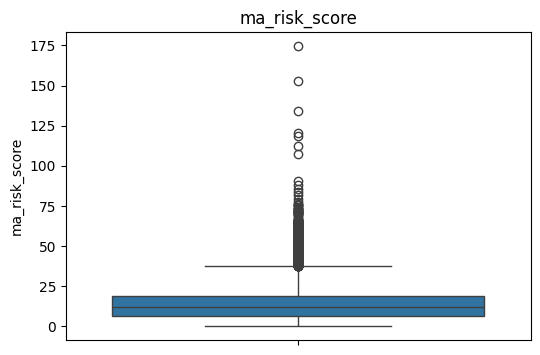

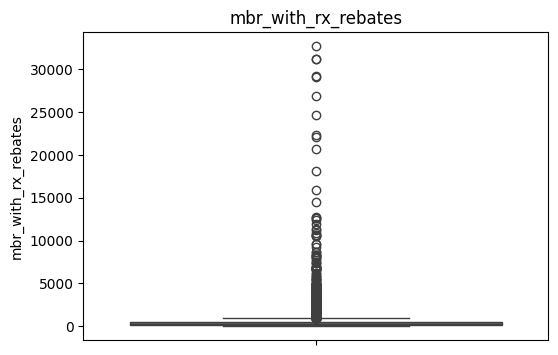

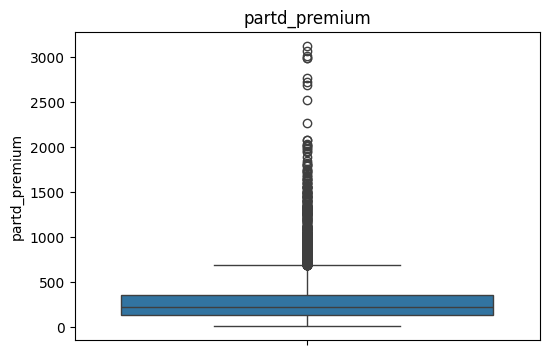

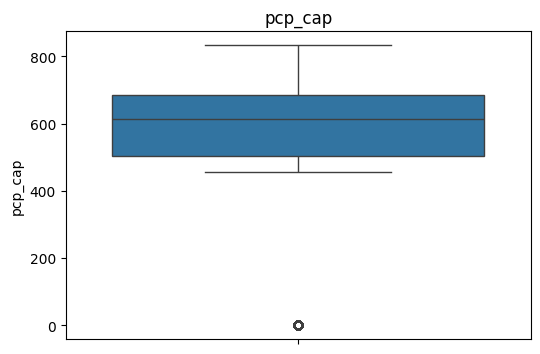

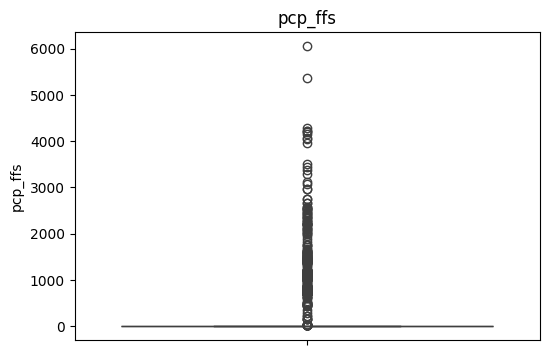

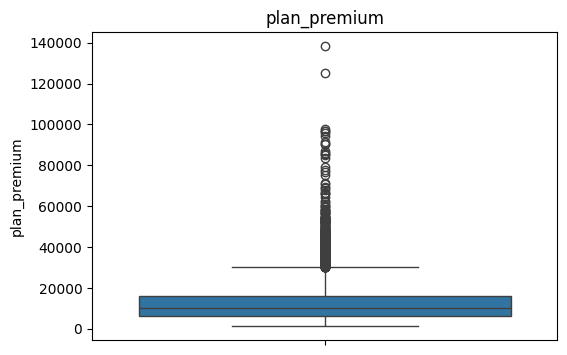

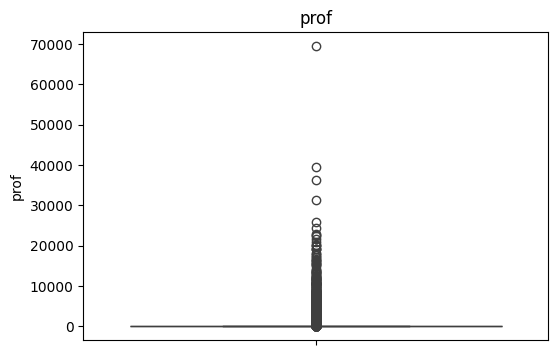

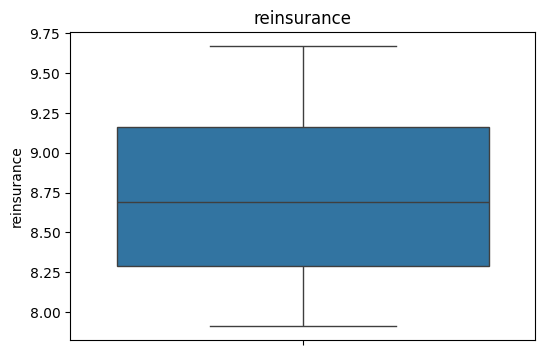

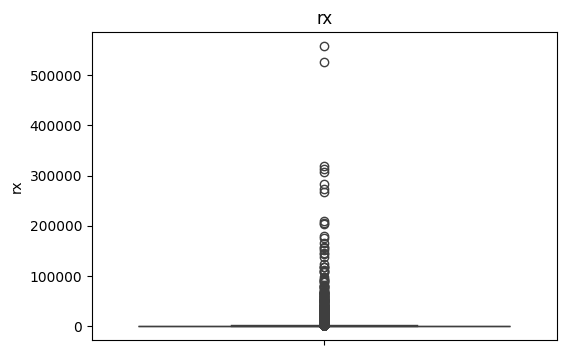

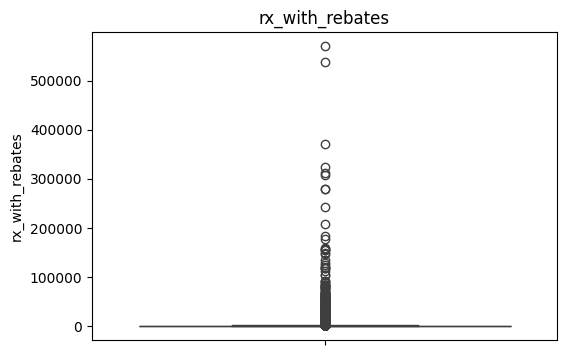

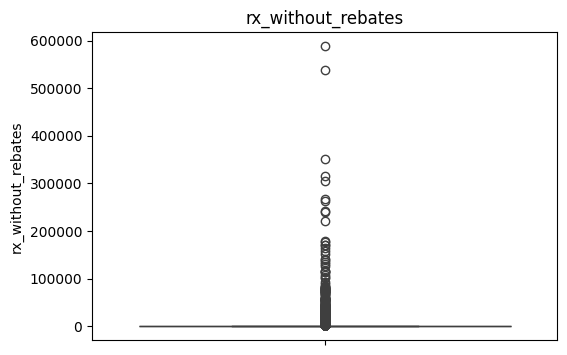

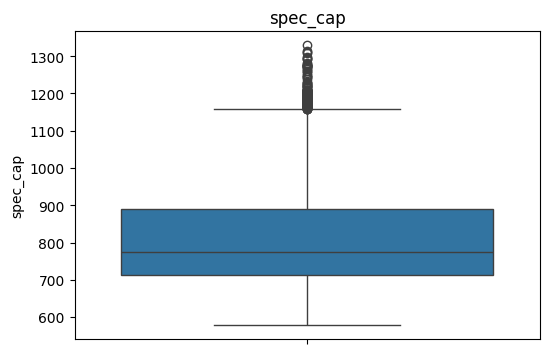

In [9]:
for i, financial_column in enumerate(financial_columns):
    plt.figure(figsize=(6, 4))
    plt.title(financial_column)
    sns.boxplot(data=sfrs[financial_column])

Plot their distribution of values with a histogram

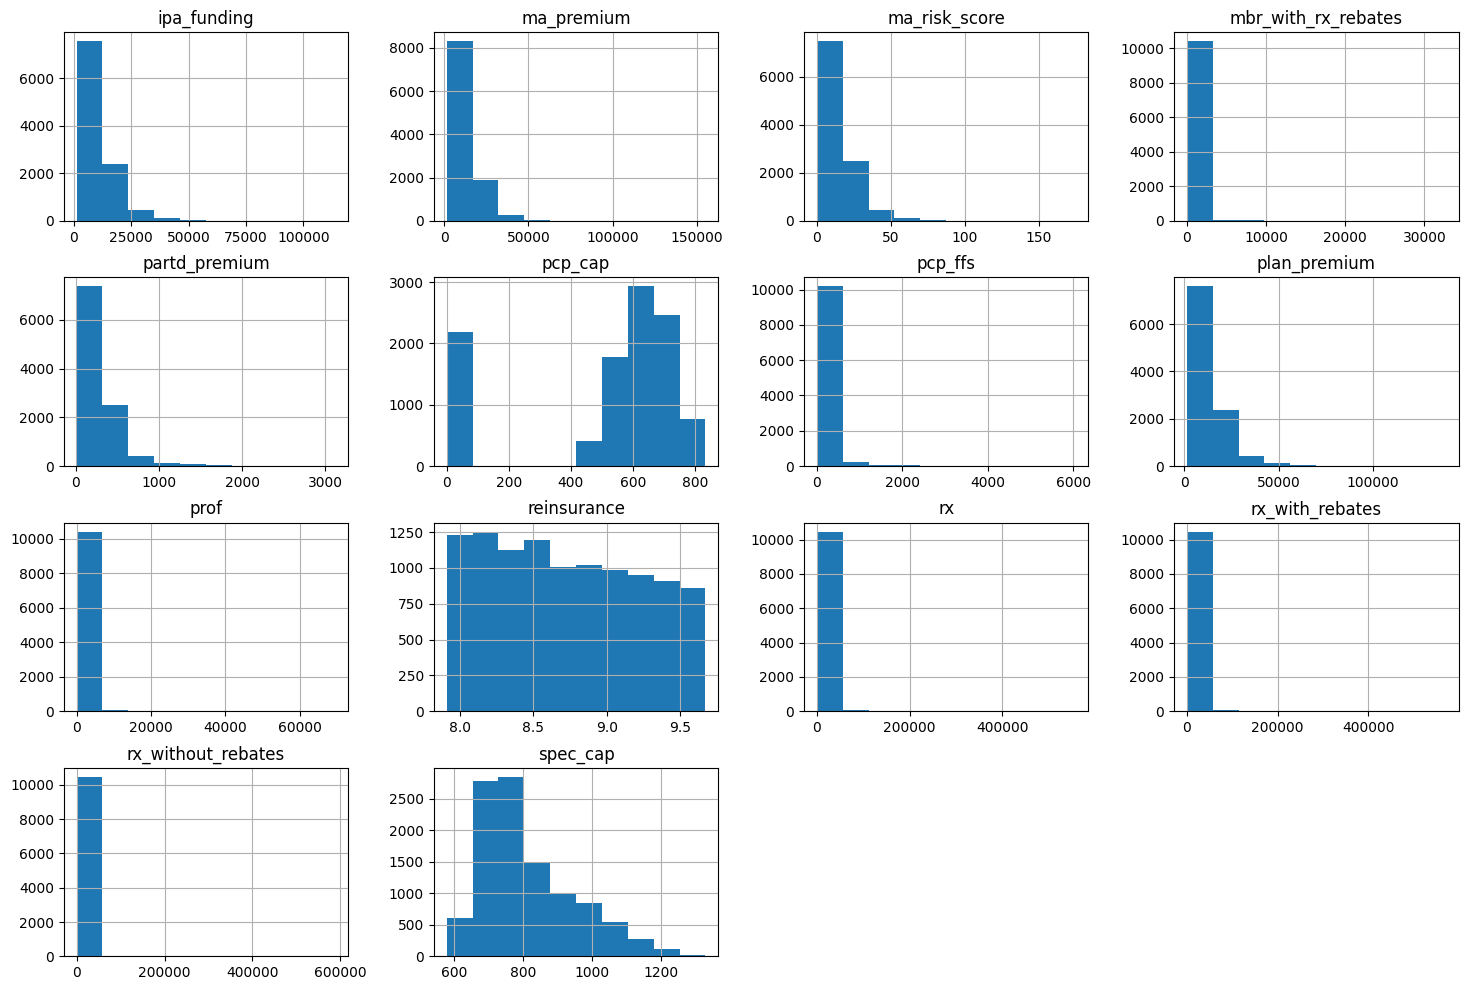

In [10]:
_ = sfrs[financial_columns].hist(figsize=(18, 12))

We can see that the columns which had a lot of outliers have the most skewed distribution of values, e.g., rx, rx_with_rebates, prof, etc. 

However, looking at these plots we can't conclude row-wise outliers; they only give us some sense of the range of values of each column and what value could potentially be treated as an outlier.

We will try one last approach toward the uni-variate outlier detection part of this assignment. We will standardize the value of each column, i.e., calculate its z-score. We'll then try to threshold the values further than 3 standard deviations from the mean so that they are considered outliers.

In [11]:
from scipy import stats
import numpy as np


z = np.abs(stats.zscore(sfrs[financial_columns]))

print(np.where(z > 3))

(array([    4,    62,    62, ..., 10513, 10513, 10513], dtype=int64), array([8, 0, 1, ..., 1, 2, 7], dtype=int64))


In [12]:
sfrs_outliers = sfrs[financial_columns][(z > 3).any(axis=1)]
sfrs.iloc[sfrs_outliers.index]

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
4,5,M,31/12/1953,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,0.0,19976.13,8875.80,8.90,0.0,522.48,0.0,517.56,606.01,867.55
62,63,M,29/06/1944,2020,202006,Affiliate,D-SNP,NaN,1,HMO,...,0.0,52110.53,0.00,9.48,0.0,27513.95,0.0,30963.89,32025.88,957.09
107,108,M,18/05/1956,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,...,0.0,36986.52,0.00,8.82,0.0,34279.67,0.0,35680.20,35819.58,818.94
122,123,M,30/06/1960,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,0.0,26505.44,15684.94,9.19,0.0,370.58,0.0,443.31,381.42,941.42
130,131,F,07/03/1968,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,2,HMO,...,0.0,15987.45,0.00,9.62,0.0,180462.51,0.0,155800.97,170609.15,794.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10464,10465,F,15/11/1952,2020,202006,SaludVIP,D-SNP,MEDICARE - CARENEEDS,93,HMO,...,0.0,47530.73,0.00,8.58,0.0,16817.65,0.0,16056.29,15375.67,965.78
10467,10468,M,27/11/1962,2020,202006,SaludVIP,D-SNP,MEDICARE - CARENEEDS,93,HMO,...,0.0,68885.56,1464.21,9.34,0.0,0.00,0.0,0.00,0.00,849.53
10480,10481,M,28/06/1941,2020,202006,SaludVIP,D-SNP,NaN,93,HMO,...,0.0,42951.59,383.18,8.61,0.0,519.83,0.0,558.89,547.31,988.67
10504,10505,M,18/04/1945,2020,202006,SaludVIP,D-SNP,NaN,93,HMO,...,0.0,27758.45,1074.61,9.50,0.0,151.94,0.0,140.86,137.64,944.89


Illustrate the example where the rows have more than 7 (half) values as outliers

In [13]:
outliers_row_indices = np.where(z > 3)[0]
unique_values, counts = np.unique(outliers_row_indices, return_counts=True)
outlier_counts = np.array((unique_values, counts)).T

# try changing the threshold (number of columns that are considered outliers), and see the results
threshold = 7

outliers = [x for x in outlier_counts if x[1] > threshold]

indices = [i[0] for i in outliers]
sfrs.iloc[indices]

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
780,781,F,22/04/1965,2020,202006,Affiliate,NON-SNP,NaN,6,HMO,...,0.00,53792.64,4355.27,8.12,0.0,210082.16,0.0,207571.22,221233.01,718.21
1558,1559,M,09/04/1954,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,12,HMO,...,2569.72,52416.81,14883.56,9.24,0.0,53395.04,0.0,50224.55,50035.92,904.75
2930,2931,F,06/07/1946,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,23,HMO,...,0.00,45385.61,19028.78,8.62,0.0,144987.53,0.0,149322.70,134973.37,746.08
6497,6498,M,10/05/1961,2020,202006,VIPcare,NON-SNP,NaN,57,HMO,...,0.00,54523.31,0.00,9.26,0.0,557883.96,0.0,570037.03,588346.57,803.13
8494,8495,M,23/03/1960,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,72,HMO,...,0.00,46395.36,8033.50,8.22,0.0,54213.57,0.0,59583.51,51639.04,1137.09


## Multi-Variate Outlier Detection

Apply machine learning techniques to detect outliers. 

We will train some models that take all financial columns as input and output some kind of classification or categorization of whether the input is an outlier or not.

The `sklearn` library has implemented some of the most widely known and used machine learning algorithms for outlier detection: [isolation forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) and [https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html](local outlier factor).

In [14]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

Apply the algorithms with their default parameters.

In [15]:
isolation_forest = IsolationForest()

isolation_forest = isolation_forest.fit(sfrs[financial_columns])

inference = isolation_forest.predict(sfrs[financial_columns])


indices_if = np.where(inference == -1)[0]  # np.where() returns a tuple of one element

print("There are", len(indices_if), "members marked as outliers")

sfrs.iloc[indices_if]

There are 1022 members marked as outliers


,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
1,2,M,02/01/1948,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,0.0,6204.84,0.00,8.13,0.0,11289.69,0.0,10688.46,10859.82,906.77
26,27,M,10/05/1955,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,0.0,5229.48,0.00,8.79,0.0,12753.16,0.0,13866.12,13189.06,957.09
38,39,M,31/03/1938,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,...,0.0,29082.72,3197.58,8.42,0.0,4727.12,0.0,4746.47,4215.73,826.00
54,55,F,29/01/1952,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,0.0,8227.35,0.00,9.26,0.0,13578.86,0.0,14515.80,15042.28,943.48
62,63,M,29/06/1944,2020,202006,Affiliate,D-SNP,NaN,1,HMO,...,0.0,52110.53,0.00,9.48,0.0,27513.95,0.0,30963.89,32025.88,957.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10467,10468,M,27/11/1962,2020,202006,SaludVIP,D-SNP,MEDICARE - CARENEEDS,93,HMO,...,0.0,68885.56,1464.21,9.34,0.0,0.00,0.0,0.00,0.00,849.53
10473,10474,F,25/01/1931,2020,202006,SaludVIP,NON-SNP,NaN,93,HMO,...,0.0,24552.03,0.00,8.56,0.0,13142.53,0.0,14746.97,15316.04,872.14
10477,10478,M,16/05/1954,2020,202006,SaludVIP,D-SNP,MEDICARE - CARENEEDS,93,HMO,...,0.0,23861.66,957.03,8.19,0.0,11022.89,0.0,13295.90,12065.29,960.72
10480,10481,M,28/06/1941,2020,202006,SaludVIP,D-SNP,NaN,93,HMO,...,0.0,42951.59,383.18,8.61,0.0,519.83,0.0,558.89,547.31,988.67


Same procedure with the local outlier factor algorithm.

In [16]:
local_outlier_factor = LocalOutlierFactor()
inference = local_outlier_factor.fit_predict(sfrs[financial_columns])
indices_lof = np.where(inference == -1)[0]

print("There are", len(indices_lof), "members marked as outliers")

sfrs.iloc[indices_lof]

There are 258 members marked as outliers


,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
21,22,M,28/07/1953,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,0.0,4889.90,0.00,9.25,0.0,0.00,0.0,0.00,0.00,838.04
69,70,M,19/10/1959,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,0.0,6355.39,808.15,7.94,0.0,0.00,0.0,0.00,0.00,863.20
71,72,F,30/04/1951,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,0.0,5049.74,0.00,8.00,0.0,0.00,0.0,0.00,0.00,788.97
153,154,F,28/08/1939,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,2,HMO,...,0.0,5524.63,1215.20,8.06,0.0,536.10,0.0,631.26,587.23,797.12
280,281,M,16/10/1950,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,5,HMO,...,0.0,7613.64,0.00,8.55,0.0,0.00,0.0,0.00,0.00,849.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10393,10394,F,11/09/1970,2020,202006,VIPcare,NON-SNP,NaN,91,HMO,...,0.0,27777.57,0.00,8.25,0.0,282935.14,0.0,307263.96,267754.53,983.67
10416,10417,F,01/10/1952,2020,202006,Affiliate,NON-SNP,NaN,92,HMO,...,0.0,26991.41,20216.10,8.26,0.0,39042.92,0.0,40740.43,34167.00,674.73
10446,10447,M,05/09/1939,2020,202006,SaludVIP,NON-SNP,NaN,93,HMO,...,0.0,31192.02,8272.33,7.97,0.0,20628.43,0.0,17266.76,18408.79,891.63
10461,10462,M,04/08/1980,2020,202006,SaludVIP,D-SNP,MEDICARE - CARENEEDS,93,HMO,...,0.0,11707.19,0.00,9.03,0.0,0.00,0.0,0.00,0.00,885.61


There's quite some discrepancy between the predictions of both algorithms. To become more confident in our predictions for an outlier, we can mark as such only those individuals that have been predicted as outliers by both algorithms.

In [17]:
common_indices = list(set(indices_if).intersection(set(indices_lof)))
sfrs.iloc[common_indices]

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
2561,2562,M,15/08/1947,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,20,HMO,...,0.00,21796.83,39523.72,8.76,0.0,2095.67,0.0,1913.95,2188.25,962.69
7170,7171,M,12/06/1932,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,61,HMO,...,0.00,26351.77,12994.91,8.09,0.0,0.00,0.0,0.00,0.00,1038.88
6662,6663,F,15/09/1951,2020,202006,Affiliate,NON-SNP,NaN,58,HMO,...,4161.69,7034.44,4351.99,8.48,0.0,597.39,0.0,551.25,551.25,771.61
9734,9735,M,12/12/1941,2020,202006,VIPcare,NON-SNP,NaN,85,HMO,...,0.00,7977.05,4401.54,9.14,0.0,95.73,0.0,92.94,105.10,894.95
3602,3603,F,07/11/1944,2020,202006,Affiliate,NON-SNP,NaN,26,HMO,...,4286.85,12275.82,4477.37,9.10,0.0,5249.51,0.0,4683.94,5220.85,712.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9709,9710,M,21/05/1940,2020,202006,VIPcare,D-SNP,MEDICARE - CARENEEDS,85,HMO,...,0.00,34069.08,9367.75,9.51,0.0,4344.18,0.0,4321.93,3859.29,1036.52
495,496,F,18/11/1946,2020,202006,Affiliate,NON-SNP,NaN,5,HMO,...,0.00,35222.58,24422.50,7.96,0.0,121.34,0.0,134.57,115.22,821.88
5104,5105,F,12/06/1950,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,38,HMO,...,0.00,3927.14,1041.67,9.46,0.0,6918.37,0.0,7600.16,7290.10,721.85
3574,3575,M,08/04/1955,2020,202006,Affiliate,D-SNP,NaN,26,HMO,...,747.07,10781.36,3468.13,8.43,0.0,4480.10,0.0,4559.36,5265.32,796.47


111 members are identified as outliers by both algorithms. As a final presentation, we can plot the distribution of the values in the financial columns only for the detected outliers and try to compare them with the previous one over the entire data set. Try if you can notice any differences and explain why these members were identified as outliers.

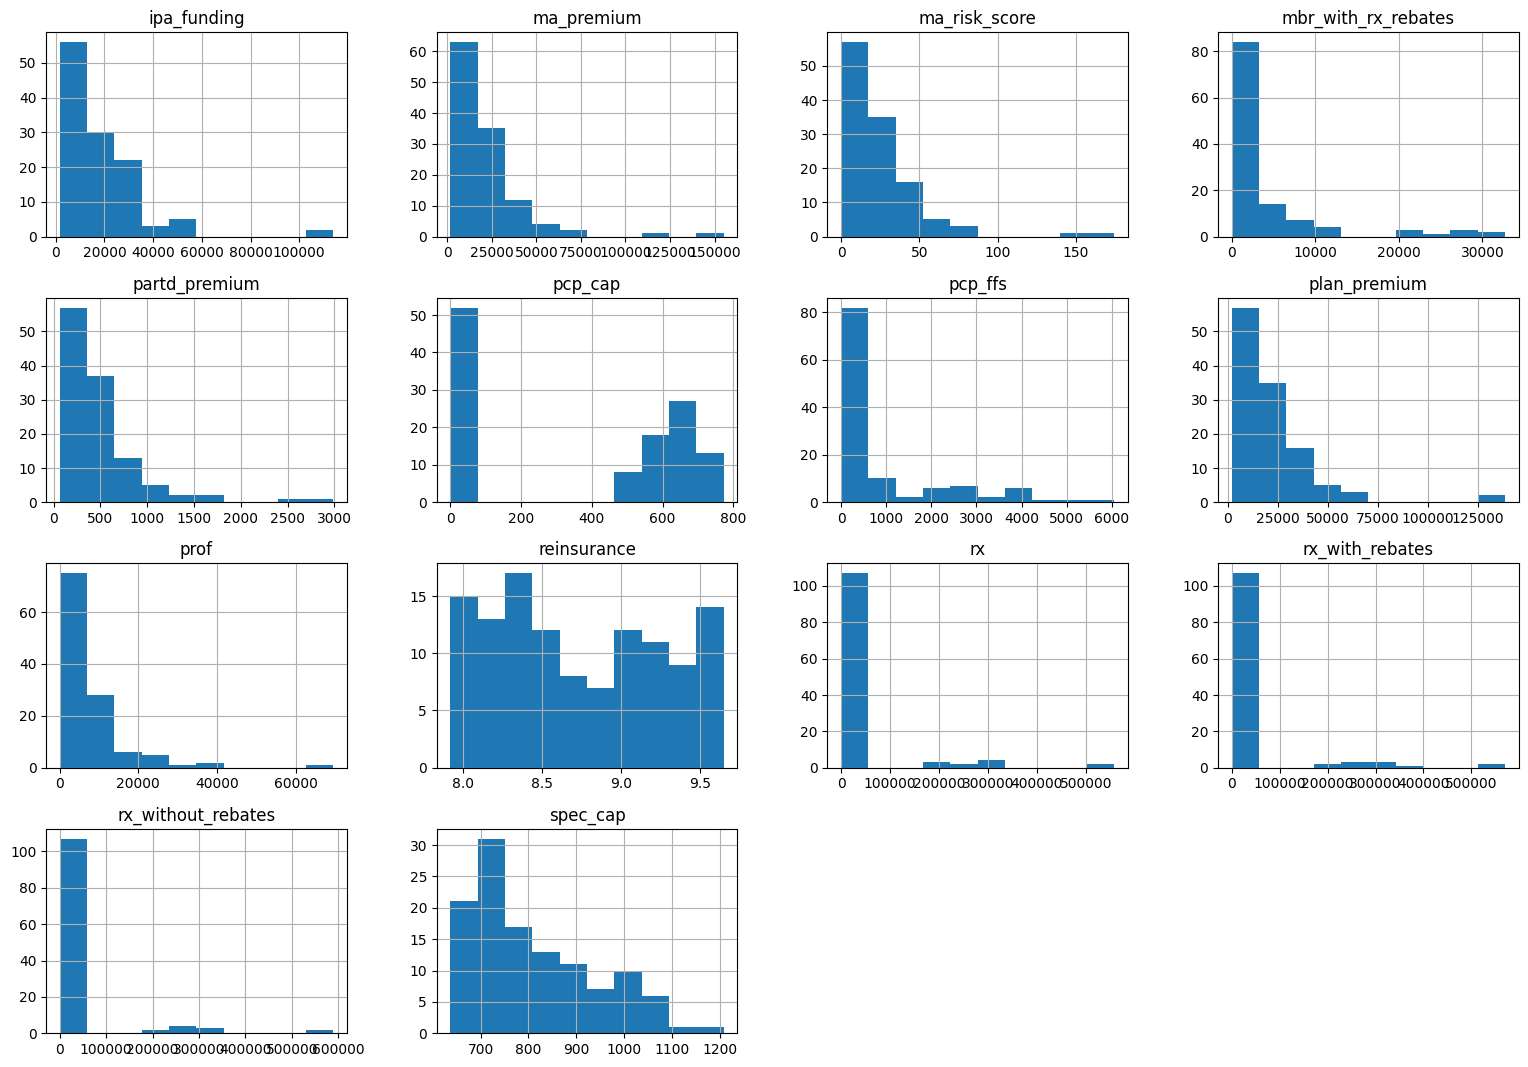

In [18]:
_ = sfrs.iloc[common_indices][financial_columns].hist(figsize=(19, 13))